# 📘 Домашнє завдання №4. Лінійна алгебра для Data Science - вектори
**Лекція 6-7. Лінійна алгебра для Data Science - векторита матриці**

Виконав: **Bohdan Pinchuk**

Link: https://github.com/BogdanPinchuk/DataScience-PBY_HW4

## Задача 1. Вектори і базові операції

**Умова**:
Задано два вектори в $\mathbb{R}^3$:
```
a = np.array([1, 2, 3])
b = np.array([4, -1, 2])
```

**Потрібно**:

1. Обчислити:
    * суму `a + b`
    * різницю `a - b`
    * скалярний добуток `a · b`
2. Обчислити довжини (L2-норми) векторів `a` і `b`
3. Перевірити вручну (через формулу), що:
$$
|| a+b||\leq ||a||+||b||
$$


In [18]:
#### Variant №1 ####

import numpy as np
from math import sqrt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from fontTools.ttLib.tables.C_P_A_L_ import Color
from matplotlib.ticker import AutoMinorLocator
from matplotlib.typing import CapStyleType
from pexpect import which
from wcwidth import width

# Input data
a = np.array([1, 2, 3])
b = np.array([4, -1, 2])
tolerance = 4

# Solution
max_len_lf, max_len_rt = 0, 0
data_list = list()


def form_report_data(key: str, value: str):
    """
    Form the report data
    :param key: Attribute
    :param value: Result
    """
    global max_len_lf, max_len_rt
    max_len_lf = max(max_len_lf, len(key))
    max_len_rt = max(max_len_rt, len(value))
    data_list.append((key, value))


def print_report_string(row: tuple[str, str]):
    """
    Print the report string
    :param row: tuple of data
    """
    print(f" {f"{row[0]}":<{max_len_lf}} | {f"{row[1]}":<{max_len_rt}}")


def print_line_splitter():
    """
    Print line splitter
    """
    print("-" * (max_len_lf + max_len_rt + 5))


form_report_data('Attribute', 'Result')
form_report_data('Вектор: a', str(a))
form_report_data('Вектор: b', str(b))

# alternative: np.add(a, b)
sum_vec = a + b
form_report_data('Сума векторів: a + b', str(sum_vec))

# alternative: np.subtract(a, b)
diff_vec = a - b
form_report_data('Різниця векторів: a - b', str(diff_vec))

# alternative: np.dot(a, b)
# alternative: a.dot(b)
# alternative: sum(a * b)
scalar_prod = a @ b
form_report_data('Скалярний добуток векторів: a * b', str(scalar_prod))

# alternative: sqrt(np.sum(a * a))
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
form_report_data('Довжина (L2-норми) вектора: ||a||₂', f"{norm_a:.{tolerance}f}")
form_report_data('Довжина (L2-норми) вектора: ||b||₂', f"{norm_b:.{tolerance}f}")

norm_a_plus_norm_b = norm_a + norm_b
form_report_data('Сума довжин (L2-норми) векторів: ||a|| + ||b||', f"{norm_a_plus_norm_b:.{tolerance}f}")
norm_a_plus_b = np.linalg.norm(a + b)
form_report_data('Довжина (L2-норми) суми векторів: ||a + b||', f"{norm_a_plus_b:.{tolerance}f}")

triangle_inequality_condition = norm_a_plus_b <= norm_a_plus_norm_b
tic_str = "справджується" if triangle_inequality_condition else "не справджується"
form_report_data('Перевірка за умовою ||a + b|| <= ||a|| + ||b| нерівності трикутника', tic_str)

# Print results
print_line_splitter()
print_report_string(data_list[0])
print_line_splitter()
for item in data_list[1:]:
    print_report_string(item)
print_line_splitter()

# Graphic results
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = itertools.cycle([f"C{i}" for i in range(10)])


def draw_3d_vector(axes: Axes3D, v_end: np.ndarray, v_name: str, margin: float = 0.5,
                   v_start: np.ndarray = np.array([0, 0]), v_label: str = "u", v_pad: float = 7.5,
                   chart_sign: tuple[str, str, str, str] = ('Chart', 'X axis', 'Y axis', 'Z axis')):
    """
    Draw a 3d vector
    :param axes: axes object
    :param v_start: start of the vector
    :param v_end: end of the vector
    :param v_name: name of the vector
    :param margin: margin from the chart
    :param v_label: position of the vector label
    :param v_pad: indentation from the vector
    :param chart_sign: chart signature -> (title, X_axis, Y_axis, Z_axis)
    """
    x_len = v_end[0] - v_start[0]
    y_len = v_end[1] - v_start[1]
    z_len = v_end[2] - v_start[2]
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    z_min, z_max = ax.get_zlim()
    # update axes limits
    x_min = min(x_min + margin, min(v_start[0], v_end[0])) - margin
    x_max = max(x_max - margin, max(v_start[0], v_end[0])) + margin
    y_min = min(y_min + margin, min(v_start[1], v_end[1])) - margin
    y_max = max(y_max - margin, max(v_start[1], v_end[1])) + margin
    z_min = min(z_min + margin, min(v_start[2], v_end[2])) - margin
    z_max = max(z_max - margin, max(v_start[2], v_end[2])) + margin
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    axes.set_zlim(z_min, z_max)
    axes.set_box_aspect(1)

    # Plot settings
    axes.set_title(chart_sign[0], fontsize=15, pad=10, loc='center', color='black')
    axes.set_xlabel(chart_sign[1], fontsize=12.5, labelpad=10, loc='center', color='black')
    axes.set_ylabel(chart_sign[2], fontsize=12.5, labelpad=10, loc='center', color='black')
    axes.set_zlabel(chart_sign[3], fontsize=12.5, labelpad=10, loc='center', color='black')
    axes.grid(axis='both', visible=True, which='major', ls='--', linewidth=1.0, color='tab:gray')
    # ax.tick_params(axis='both', which='major', grid_color='tab:blue', labelcolor='black')
    axes.minorticks_on()
    axes.grid(axis='both', visible=True, which='minor', ls=':', linewidth=0.5, color='tab:green')
    # ax.tick_params(axis='both', which='minor', grid_color='tab:green', labelcolor='black')

    match v_label:
        case ("u"):
            annot_text_pos = (0, v_pad)
        case ("d"):
            annot_text_pos = (0, -v_pad)
        case ("l"):
            annot_text_pos = (-v_pad, 0)
        case ("r"):
            annot_text_pos = (0, v_pad)
        case ("ur"):
            annot_text_pos = (v_pad, v_pad)
        case ("ul"):
            annot_text_pos = (-v_pad, v_pad)
        case ("dr"):
            annot_text_pos = (v_pad, -v_pad)
        case ("dl"):
            annot_text_pos = (-v_pad, -v_pad)
        case _:
            annot_text_pos = (0, 0)

    # Arrow
    current_color = next(colors)
    x_annot = v_start[0] + (x_len / 2.0)
    y_annot = v_start[1] + (y_len / 2.0)
    z_annot = v_start[2] + (z_len / 2.0)
    axes.quiver(v_start[0], v_start[1], v_start[2], x_len, y_len, z_len,
                angles='xy', scale_units='xy', scale=1, color=current_color)
    # TODO: change
    # axes.text(fr"$\vec{{{v_name}}}$", (x_annot, y_annot), xytext=annot_text_pos, fontsize=15,
    #               color=current_color, textcoords='offset points', ha='center', va='center')


-------------------------------------------------------------------------------------
 Attribute                                                           | Result       
-------------------------------------------------------------------------------------
 Вектор: a                                                           | [1 2 3]      
 Вектор: b                                                           | [ 4 -1  2]   
 Сума векторів: a + b                                                | [5 1 5]      
 Різниця векторів: a - b                                             | [-3  3  1]   
 Скалярний добуток векторів: a * b                                   | 8            
 Довжина (L2-норми) вектора: ||a||₂                                  | 3.7417       
 Довжина (L2-норми) вектора: ||b||₂                                  | 4.5826       
 Сума довжин (L2-норми) векторів: ||a|| + ||b||                      | 8.3242       
 Довжина (L2-норми) суми векторів: ||a + b||                   

In [ ]:
#### Variant №2 ####

import numpy as np
import apps.main as mn

# Input data
a = np.array([1, 2, 3])
b = np.array([4, -1, 2])
tolerance = 4

# Solution
general_data = (0, 0, list())
frd = mn.form_report_data

general_data = frd('Attribute', 'Result', general_data)
general_data = frd('Вектор: a', str(a), general_data)
general_data = frd('Вектор: b', str(b), general_data)

# alternative: np.add(a, b)
sum_vec = a + b
general_data = frd('Сума векторів: a + b', str(sum_vec), general_data)

# alternative: np.subtract(a, b)
diff_vec = a - b
general_data = frd('Різниця векторів: a - b', str(diff_vec), general_data)

# alternative: np.dot(a, b)
# alternative: a.dot(b)
# alternative: sum(a * b)
scalar_prod = a @ b
general_data = frd('Скалярний добуток векторів: a * b', str(scalar_prod), general_data)

# alternative: sqrt(np.sum(a * a))
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
general_data = frd('Довжина (L2-норми) вектора: ||a||₂', f"{norm_a:.{tolerance}f}", general_data)
general_data = frd('Довжина (L2-норми) вектора: ||b||₂', f"{norm_b:.{tolerance}f}", general_data)

norm_a_plus_norm_b = norm_a + norm_b
general_data = frd('Сума довжин (L2-норми) векторів: ||a|| + ||b||',
                   f"{norm_a_plus_norm_b:.{tolerance}f}", general_data)
norm_a_plus_b = np.linalg.norm(a + b)
general_data = frd('Довжина (L2-норми) суми векторів: ||a + b||', f"{norm_a_plus_b:.{tolerance}f}",
                   general_data)

triangle_inequality_condition = norm_a_plus_b <= norm_a_plus_norm_b
tic_str = "справджується" if triangle_inequality_condition else "не справджується"
general_data = frd('Перевірка за умовою ||a + b|| <= ||a|| + ||b| нерівності трикутника', tic_str,
                   general_data)

(max_len_lf, max_len_rt, data_list) = general_data

# Print results
mn.print_line_splitter((max_len_lf, max_len_rt))
mn.print_report_string(data_list[0], (max_len_lf, max_len_rt))
mn.print_line_splitter((max_len_lf, max_len_rt))
for item in data_list[1:]:
    mn.print_report_string(item, (max_len_lf, max_len_rt))
mn.print_line_splitter((max_len_lf, max_len_rt))

## Задача 2. Кут між векторами та косинусна подібність

**Умова**:

Задано два вектори ознак:
```
x = np.array([2, 1, 0, 2])
y = np.array([1, 0, 1, 2])
```

**Потрібно**:
1. Обчислити косинус кута між x та y
2. Знайти сам кут у градусах (використати [np.arccos](https://numpy.org/devdocs/reference/generated/numpy.arccos.html) та [np.degrees](https://numpy.org/doc/2.1/reference/generated/numpy.degrees.html))


In [19]:
#### Variant №1 ####

import numpy as np
from math import pi, acos

# Input data
x = np.array([2, 1, 0, 2])
y = np.array([1, 0, 1, 2])
tolerance = 4

# Solution
scalar_prod = x @ y
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
norm_x_prod_norm_y = norm_x * norm_y

cos_alpha = scalar_prod / norm_x_prod_norm_y

# alternative: acos(cos_alpha)
alpha_rad = np.arccos(cos_alpha)

# alternative: np.rad2deg(alpha_rad)
# alternative: alpha_rad * 180 / np.pi
# alternative: alpha_rad * 180 / pi
alpha_deg = np.degrees(alpha_rad)

# Print results
print(f"Вектор: x = {x}")
print(f"Вектор: y = {y}")
print(f"Косинусна подібність: cos(𝜶) = {cos_alpha:.{tolerance}f}")
print(f"Кут між векторами: 𝜶 = {alpha_deg:.{tolerance}f}°")

Вектор: x = [2 1 0 2]
Вектор: y = [1 0 1 2]
Косинусна подібність: cos(𝜶) = 0.8165
Кут між векторами: 𝜶 = 35.2644°


In [ ]:
#### Variant №2 ####

import numpy as np
import apps.main as mn

# Input data
x = np.array([2, 1, 0, 2])
y = np.array([1, 0, 1, 2])
tolerance = 4

# Solution
cos_alpha, alpha_deg = mn.calc_cosine_similarity(x, y)

# Print results
print(f"Вектор: x = {x}")
print(f"Вектор: y = {y}")
print(f"Косинусна подібність: cos(𝜶) = {cos_alpha:.{tolerance}f}")
print(f"Кут між векторами: 𝜶 = {alpha_deg:.{tolerance}f}°")

## Задача 3. Норми та метрики

**Умова**:

Задано дві точки в просторі ознак:
```
p = np.array([1, 2, 3, 4])
q = np.array([4, 0, 3, 1])
```

**Потрібно**:

Обчислити:
  * Евклідову відстань (L2)
  * Манхеттенську відстань (L1)
  * Порівняти результати

In [ ]:
#### Variant №1 ####

import numpy as np

# Input data
p = np.array([1, 2, 3, 4])
q = np.array([4, 0, 3, 1])
tolerance = 4

# Solution
v1 = p - q
v2 = q - p
l2_v1 = np.linalg.norm(v1, ord=2)
l1_v1 = np.linalg.norm(v1, ord=1)
l2_v2 = np.linalg.norm(v2, ord=2)
l1_v2 = np.linalg.norm(v2, ord=1)

max_len_lf, max_len_rt = 0, 0
data_list = list()


def compare_values(val1, val2) -> str:
    """
    Comparing 2 values
    :param val1: value 1
    :param val2: value 2
    :return: sign "<", or ">", or "=="
    """
    if val1 == val2:
        return "=="
    elif val1 > val2:
        return ">"
    else:
        return "<"


form_report_data('Attribute', 'Result')
form_report_data('Точка вектора: p', str(p))
form_report_data('Точка вектора: q', str(q))

form_report_data('Вектор (за напрямком 1): v1 = p - q', str(v1))
form_report_data('Вектор (за напрямком 2): v2 = q - p', str(v2))

form_report_data('Довжина (L2-норми) вектора: ||v1||₂', f"{l2_v1:.{tolerance}f}")
form_report_data('Довжина (L2-норми) вектора: ||v2||₂', f"{l2_v2:.{tolerance}f}")
form_report_data('Довжина (L1-норми) вектора: ||v1||₁', f"{l1_v1:.{tolerance}f}")
form_report_data('Довжина (L1-норми) вектора: ||v2||₁', f"{l1_v2:.{tolerance}f}")

form_report_data('Порівняння (L2-норми) векторів: v2 ? v1', f"||v1||₂ {compare_values(l2_v1, l2_v2)} ||v2||₂")
form_report_data('Порівняння (L1-норми) векторів: v2 ? v1', f"||v1||₁ {compare_values(l1_v1, l1_v2)} ||v2||₁")
form_report_data('Порівняння (L2-норми) і (L1-норми) вектора: v1', f"||v1||₂ {compare_values(l2_v1, l1_v1)} ||v1||₁")

# Print results
print_line_splitter()
print_report_string(data_list[0])
print_line_splitter()
for item in data_list[1:]:
    print_report_string(item)
print_line_splitter()

In [ ]:
#### Variant №2 ####

import numpy as np
import apps.main as mn

# Input data
p = np.array([1, 2, 3, 4])
q = np.array([4, 0, 3, 1])
tolerance = 4

# Solution
v1 = p - q
v2 = q - p
l2_v1 = np.linalg.norm(v1, ord=2)
l1_v1 = np.linalg.norm(v1, ord=1)
l2_v2 = np.linalg.norm(v2, ord=2)
l1_v2 = np.linalg.norm(v2, ord=1)

general_data = (0, 0, list())
frd = mn.form_report_data
cv = mn.compare_values

general_data = frd('Attribute', 'Result', general_data)

general_data = frd('Точка вектора: p', str(p), general_data)
general_data = frd('Точка вектора: q', str(q), general_data)

general_data = frd('Вектор (за напрямком 1): v1 = p - q', str(v1), general_data)
general_data = frd('Вектор (за напрямком 2): v2 = q - p', str(v2), general_data)

general_data = frd('Довжина (L2-норми) вектора: ||v1||₂', f"{l2_v1:.{tolerance}f}", general_data)
general_data = frd('Довжина (L2-норми) вектора: ||v2||₂', f"{l2_v2:.{tolerance}f}", general_data)
general_data = frd('Довжина (L1-норми) вектора: ||v1||₁', f"{l1_v1:.{tolerance}f}", general_data)
general_data = frd('Довжина (L1-норми) вектора: ||v2||₁', f"{l1_v2:.{tolerance}f}", general_data)

general_data = frd('Порівняння (L2-норми) векторів: v2 ? v1', f"||v1||₂ {cv(l2_v1, l2_v2)} ||v2||₂", general_data)
general_data = frd('Порівняння (L1-норми) векторів: v2 ? v1', f"||v1||₁ {cv(l1_v1, l1_v2)} ||v2||₁", general_data)
general_data = frd('Порівняння (L2-норми) і (L1-норми) вектора: v1', f"||v1||₂ {cv(l2_v1, l1_v1)} ||v1||₁",
                   general_data)

(max_len_lf, max_len_rt, data_list) = general_data

# Print results
mn.print_line_splitter((max_len_lf, max_len_rt))
mn.print_report_string(data_list[0], (max_len_lf, max_len_rt))
mn.print_line_splitter((max_len_lf, max_len_rt))
for item in data_list[1:]:
    mn.print_report_string(item, (max_len_lf, max_len_rt))
mn.print_line_splitter((max_len_lf, max_len_rt))

## Задача 4. Проєкція вектора на напрямок

**Умова**:

Нехай:
```
x = np.array([3, 4])
v = np.array([1, 1])
```

**Потрібно**:
1. Обчислити проєкцію `x` на напрямок `v` (див. [приклад](https://ua.onlinemschool.com/math/library/vector/projection/))
2. Обчислити залишок:
$$
r = x-proj_{v} x
$$
3. Перевірити, що `r` ортогональний до `v` (через скалярний добуток)



**Скалярний добуток геометричних векторів обчислюється за формулою:**
[wiki](https://uk.wikipedia.org/wiki/Скалярний_добуток)

$$\begin{matrix} \vec{x} \cdot \vec{y} = \left| \vec{x} \right| \cdot \left| \vec{y} \right| \cdot cos \left( \alpha \right) & (1) \end{matrix}$$

де $\left| \vec{x} \right|$ - довжина вектора $\vec{x}$, а $\left| \vec{y} \right|$ - довжина вектора $\vec{y}$ відповідно;
$\alpha$ - кут між векторами $\vec{x}$ і $\vec{y}$.

Тоді скалярна проєкція $\vec{x}$ на $\vec{y}$ розраховується за формулою:
[wiki](https://uk.wikipedia.org/wiki/Проєкція_вектора)
$$\begin{matrix} proj_{y}x = \left| \vec{x}\right| \cdot cos\left( \alpha \right) & (2) \end{matrix}$$
Далі виразимо (1) через (2):
$$\begin{matrix} \vec{x} \cdot \vec{y} = \left| \vec{y} \right| \cdot proj_{y}x & (3) \end{matrix}$$
Знайдемо скалярну проєкцію:
$$\begin{matrix} proj_{y}x = \frac{\vec{x} \cdot \vec{y}}{\left| \vec{y} \right|} & (4) \end{matrix}$$
Для того щоб отримати векторну проекцію необхідні змінити "розмірність", тобто знайти одиничний вектор $\hat{y}$ який має той самий напрям що й вектор $\vec{y}$:
$$\begin{matrix} \hat{y} = \frac{\vec{y}}{\left| \vec{y} \right|} & (5) \end{matrix}$$
Оперуючи "розмірностями" запишемо векторну проєкцію $\vec{x}$ на $\vec{y}$:
[wiki](https://uk.wikipedia.org/wiki/Проєкція_вектора)
$$\begin{matrix} proj_{\vec{y}}\vec{x} = \frac{\vec{x} \cdot \vec{y}}{\left| \vec{y} \right|} \cdot \hat{y} = \frac{\vec{x} \cdot \vec{y}}{\left| \vec{y} \right|^{2}} \vec{y} = \frac{\vec{x} \cdot \vec{y}}{\vec{y} \cdot \vec{y}} \vec{y} & (6) \end{matrix}$$
Залишок вектора (ортогональна складова), частина вектора $\vec{x}$ перпендикулярна до векторної проєкції $proj_{\vec{y}}\vec{x}$:
$$\begin{matrix} r_{\vec{y}}\vec{x} = \vec{x} - proj_{\vec{y}}\vec{x} & (7) \end{matrix}$$
Два вектори є ортогональними якщо вони один відносно одного розташовані перпендикулярно:
[wiki](https://uk.wikipedia.org/wiki/Ортогональність)
$$\alpha = 90^{\circ}$$

Тоді косинус кута дорівнює:
$$cos \left( \alpha \right) = 0$$

Підставимо цей результат в перше рівняння для вираження умови ортогональності двох векторів:
$$\begin{matrix} \vec{x} \cdot \vec{y} = 0 & (8) \end{matrix}$$

Щоб перевірити правильність розрахунку залишку вектора (7) необхідно скористатися умовою (8):
$$\begin{matrix} \vec{r}_{\vec{x}} \cdot \vec{y} = 0 & (9) \end{matrix}$$

Вектор: x = [3 4]
Вектор: v = [1 1]
Скалярна проєкція x на напрямок v: scalar_proj = 4.9497
Проєкція x на напрямок v: proj = [3.5 3.5]
Залишок вектора: r = [-0.5  0.5]
Умова того, що r ортогональний до v: справджується


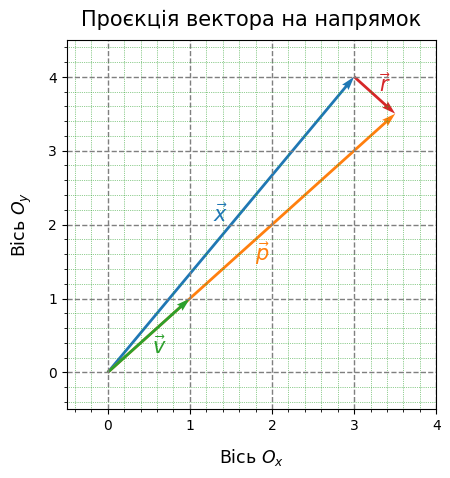

In [42]:
#### Variant №1 ####

import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

# Input data
x = np.array([3, 4])
v = np.array([1, 1])
tolerance = 4

# Solution
scalar_proj = (x @ v) / np.linalg.norm(v)
proj = ((x @ v) / (v @ v)) * v
rv_prod = x - proj
ort_cond = rv_prod @ v
cond_str = "справджується" if ort_cond == 0.0 else "не справджується"

# Print results
print(f"Вектор: x = {x}")
print(f"Вектор: v = {v}")
print(f"Скалярна проєкція x на напрямок v: scalar_proj = {scalar_proj:.{tolerance}f}")
print(f"Проєкція x на напрямок v: proj = {proj}")
print(f"Залишок вектора: r = {rv_prod}")
print(f"Умова того, що r ортогональний до v: {cond_str}")

# Graphic results
fig, ax = plt.subplots()
colors = itertools.cycle([f"C{i}" for i in range(10)])


def draw_2d_vector(axes: Axes, v_end: np.ndarray, v_name: str, margin: float = 0.5,
                   v_start: np.ndarray = np.array([0, 0]), v_label: str = "u", v_pad: float = 7.5,
                   chart_sign: tuple[str, str, str] = ('Chart', 'X axis', 'Y axis')):
    """
    Draw a 2d vector
    :param axes: axes object
    :param v_start: start of the vector
    :param v_end: end of the vector
    :param v_name: name of the vector
    :param margin: margin from the chart
    :param v_label: position of the vector label
    :param v_pad: indentation from the vector
    :param chart_sign: chart signature -> (title, X_axis, Y_axis)
    """
    x_len = v_end[0] - v_start[0]
    y_len = v_end[1] - v_start[1]
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    # update axes limits
    x_min = min(x_min + margin, min(v_start[0], v_end[0])) - margin
    x_max = max(x_max - margin, max(v_start[0], v_end[0])) + margin
    y_min = min(y_min + margin, min(v_start[1], v_end[1])) - margin
    y_max = max(y_max - margin, max(v_start[1], v_end[1])) + margin
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    axes.set_box_aspect(1)

    # Plot settings
    axes.set_title(chart_sign[0], fontsize=15, pad=10, loc='center', color='black')
    axes.set_xlabel(chart_sign[1], fontsize=12.5, labelpad=10, loc='center', color='black')
    axes.set_ylabel(chart_sign[2], fontsize=12.5, labelpad=10, loc='center', color='black')
    axes.grid(axis='both', visible=True, which='major', ls='--', linewidth=1.0, color='tab:gray')
    # ax.tick_params(axis='both', which='major', grid_color='tab:blue', labelcolor='black')
    axes.minorticks_on()
    axes.grid(axis='both', visible=True, which='minor', ls=':', linewidth=0.5, color='tab:green')
    # ax.tick_params(axis='both', which='minor', grid_color='tab:green', labelcolor='black')

    match v_label:
        case ("u"):
            annot_text_pos = (0, v_pad)
        case ("d"):
            annot_text_pos = (0, -v_pad)
        case ("l"):
            annot_text_pos = (-v_pad, 0)
        case ("r"):
            annot_text_pos = (0, v_pad)
        case ("ur"):
            annot_text_pos = (v_pad, v_pad)
        case ("ul"):
            annot_text_pos = (-v_pad, v_pad)
        case ("dr"):
            annot_text_pos = (v_pad, -v_pad)
        case ("dl"):
            annot_text_pos = (-v_pad, -v_pad)
        case _:
            annot_text_pos = (0, 0)

    # Arrow
    current_color = next(colors)
    x_annot = v_start[0] + (x_len / 2.0)
    y_annot = v_start[1] + (y_len / 2.0)
    axes.quiver(v_start[0], v_start[1], x_len, y_len,
                angles='xy', scale_units='xy', scale=1, color=current_color)
    axes.annotate(fr"$\vec{{{v_name}}}$", (x_annot, y_annot), xytext=annot_text_pos, fontsize=15,
                  color=current_color, textcoords='offset points', ha='center', va='center')


chart_signature = ('Проєкція вектора на напрямок', fr"Вісь $O_{'x'}$", fr"Вісь $O_{'y'}$")
draw_2d_vector(ax, x, "x", v_label="ul", chart_sign=chart_signature)
draw_2d_vector(ax, proj, "p", v_label="dr", chart_sign=chart_signature)
draw_2d_vector(ax, v, "v", v_label="dr", chart_sign=chart_signature)
draw_2d_vector(ax, proj, "r", v_start=rv_prod + proj, v_label="ur", chart_sign=chart_signature)

plt.show()

## Задача 5. Проєкція даних на підпростір
Дано:
```
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [4, 5],
    [5, 6]
])

v = np.array([1, 1])
```

**Потрібно**:
1. Відцентрувати X (від кожного вектора відняти середнє значення цього вектора). Використайте векторизовані операції та `np.mean()` (задайте `axis=1`).
2. Нормалізувати вектор v (поділити його на норму).
3. Проєкція на вектора на одиничний вектор - це скалярний добуток цих векторів. Знайдіть скалярні добутки відцентрованих векторів X на нормалізований вектор v.

Результатом має бути п'ятикомпонентний вектор `projections`, який містить проєкцію кожного вектора.

## Задача 6. Слайсинг матриці

Створіть матрицю 4×4 зі значеннями від 1 до 16.

Виведіть підматрицю, що складається з другого та третього рядка і другого та третього стовпця.

In [ ]:
# Підказка: np.arange, reshape
import numpy as np

A =  #

## Задача 7. Операції над матрицями

Дано матриці
$$
A = \begin{pmatrix}
1 & 2  \\
3 & 4 \end{pmatrix}, \; B = \begin{pmatrix}
5 & 6  \\
7 & 8 \end{pmatrix}.
$$

**Знайти**:
* $A+B$
* $2A$
* $A\cdot B$
* $B^T$. Перевірте чи $(B^T)^T=B$
* Перевірте чи виконується $(A\cdot B)^{-1} = B^{-1}\cdot A^{-1}$.

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# Ваш код тут

## Задача 8. Детермінант і обернена матриця

Дано матрицю
$$
A = \begin{pmatrix}
2& 1& 3\\
1& 2& 1\\
1& 0& 1
\end{pmatrix}.
$$

* Обчисліть $det(A)$
* Якщо $det(A) \neq 0$, знайдіть $A^{-1}$
* Перевірте, що $A \cdot A^{-1}=I$

In [ ]:
A = np.array([[2, 1, 3],
              [1, 2, 1],
              [1, 0, 1]])

# Ваш код тут. Для одиничної матриці використайте функцію np.identity

## Задача 9. Система лінійних рівнянь

Розв’яжіть систему використовуючи `np.linalg.solve`:
$$
\left\{\begin{matrix}
x+y+z  &=6  \\
2x+y-z &=3  \\
x-y+2z  &=7  \\
 \end{matrix}\right.
$$

In [ ]:
# Ваш код тут

## Задача 10. Власні вектори і власні значення
Дано матрицю
$$
A = \begin{pmatrix}
2 & 0 & 0\\
1 & 3 & 4\\
2 & 0 & 1\\
\end{pmatrix}.
$$
* Знайдіть власні значення та власні вектори
* Перевірте, що для кожного власного вектора $v$ і власного значення $\lambda$ виконується $Av=\lambda v$.